<a href="https://colab.research.google.com/github/elinneaeriksson/Applied_AI_Project/blob/main/Handin_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand-in 3- Clustering
*Linnea Eriksson*

#### GITHUB link: https://github.com/elinneaeriksson/TransportAI1/blob/3a0252da0df43b63043c7c4775cba280b9477dfe/Handin_Clustering.ipynb


#### Design:
The objective of this lab is to reveal the most representative day types by clustering.  The data is flow data from a road segment, in 5 minute intervals. Four clustering methods will be explored: K-means, Agglomerative, DBSCAN, GMM, and their respective parameters will be altered.

To evaluate the clustering models, both internal and external evaluation will be performed. The internal evaluation metrics used are:
Silhouette score, representing the similarity within clusters and the distance to other clusters. The score can be between -1 and 1, where a higher indicates more separated clusters (Wei, 2020).
Davies-Bouldin score, representing the similarity between different clusters, where a score closer to zero means different clusters are more distinct  (Wei, 2020).
The Calinski and Harabasz score is also measuring the distance with a cluster vs the distance to other clusters, where a higher number is better (Wei, 2020).

The external evaluation is performed in a simple way, where a testing data set is evaluating the clustering accuracy. The metrics generated through this are the Mean absolute error MAE and the Mean absolute percentage error MAPE.

#### Performance:

In the GITHUB-link, all plots and tables can be accessed.

Considering the metrics stated in the link, I consider GMM the most meaningful for this particular problem. The reasoning behind this is that I has the best scores and also shows a pattern over the year that is more intuitive with regards to traveler behavior and looks less noisy. However, the K-means clustering and agglomerative clustering had similar scores as the GMM, and are therefore also considered appropriate methods. Weighing in all metrics and a visual inspection, the best results were obtained around 9-10 clusters. The evaluation metrics and clusters for 9 clusters are shown below:

*See below or Canvas*

For K-means, the number of clusters was changed. A lower number of clusters resulted in better scores.

For agglomerative clustering the parameters altered were the linkage type. The different linkage types tended to favor different evaluation metrics, but a visual inspection of the clusterings shows that Ward  seems better for this task than the others. The best results, weighing in both the external and internal evaluation were obtained around 7-9 clusters.

For DB-scan the parameters Epsilon and MinPts were varied between 2 and respectively. The method got negative Silhouette scores and lower Davies-Bouldin and Calinski and Harabasz than the other methods. This can also be seen in the calendar, where the clusters appear random. In other words, this method did not perform well.

#### Reflections:
One of the challenges with clustering is the difficulty determining an appropriate number of clusters and finding good clustering parameters. Choosing a lower number of clusters will in most cases lead to less misclassification, due to probability, but of course it does not mean selecting the lowest possible number of clusters is always the right way to go. This trade-off is tricky, and it is clear that it is important to have expertise in the field of study to evaluate if the clustering makes sense or not.


The value of clustering is to be able to reveal patterns in the data. In the field of transport this could mean identifying, except from different day-time patterns, different traveler profiles or kinds of trips. This lab has taught me about different clustering methods and shown the importance of selecting the best method for a specific problem, since they are giving different results.

#### References:

Haitian Wei (2020) How to measure clustering performances when there are no ground truth?, Medium https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c (last accessed 2024-09-17)

## Data preparation

In [45]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [46]:
#data_df = pd.read_csv("dataset_exercise_5_clustering_highway_traffic.csv",sep=";")
data_df=pd.read_csv('gdrive/My Drive/Clustering_data/dataset_exercise_5_clustering_highway_traffic.csv',sep=';')
data_df

PORTAL      Date time_from   time_to  Interval_5  SPEED_MS_AVG  \
0       E4S 56,780  20210101  00:00:00  00:05:00           0         18.56   
1       E4S 56,780  20210101  00:05:00  00:10:00           1         20.39   
2       E4S 56,780  20210101  00:10:00  00:15:00           2         19.27   
3       E4S 56,780  20210101  00:15:00  00:20:00           3         19.52   
4       E4S 56,780  20210101  00:20:00  00:25:00           4         20.52   
...            ...       ...       ...       ...         ...           ...   
104838  E4S 56,780  20211231  23:35:00  23:40:00         283         19.58   
104839  E4S 56,780  20211231  23:40:00  23:45:00         284         19.47   
104840  E4S 56,780  20211231  23:45:00  23:50:00         285         19.77   
104841  E4S 56,780  20211231  23:50:00  23:55:00         286         18.79   
104842  E4S 56,780  20211231  23:55:00  24:00:00         287         18.75   

        flow  
0         39  
1         18  
2         26  
3         52  
4         52  
...      ...  
104838   115  
104839    87  
104840   130  
104841   129  
104842   117  

[104843 rows x 7 columns]

Your objective here is to reveal representative day-type clusters; hence, we cluster days. The provided dataset is 5-minute observations on highway microwave sensors and needs to be in a format ready for day clustering. Thus, we represent days as ordered vectors of day-time observations of size 288 (there are 288, 5-minute time observations)

In [47]:
# Sort the DataFrame 'data_df' by columns "Date" and "Interval_5"
data_df.sort_values(["Date", "Interval_5"])

# Extract unique dates from the sorted DataFrame
days = np.unique(data_df[['Date']].values.ravel())
# Calculate the total number of unique days
ndays = len(days)

# Group the DataFrame 'data_df' by the "Date" column
day_subsets_df = data_df.groupby(["Date"])

# Define the total number of 5-minute intervals in a day
nintvals = 288

# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)

# Loop through each unique day
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i])

    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame
        df_t = day_subsets_df.get_group(days[i])

        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

# Print the resulting 'vectorized_day_dataset'
print(vectorized_day_dataset)

[[ 39.  18.  26. ...  32.  39.  34.]
 [ 30.  32.  27. ...  44.  41.  39.]
 [ 36.  44.  52. ...  50.  45.  23.]
 ...
 [ 20.  34.  31. ...  38.  42.  36.]
 [ 36.  40.  25. ...  38.  56.  35.]
 [ 33.  32.  34. ... 130. 129. 117.]]


* STEP 1: We ensure the ordering of days and intervals is proper. The data integer representation and indexing of time intervals allow a simple order of data.
* STEP 2: We get all unique days in the dataset to know the number and their list
* STEP 3: We could do the same of time-intervals, but here we know it is 288
* STEP 4: We create new datasets where rows are days and columns are day-time interval observations. *Note that if you plan to reveal network-wide day-types, this day vector can be ordered vector of SENSORS * TIME-INTERVALS.*
* STEP 5: fill in data to the right indexes.

In [48]:

print('number of nans',np.sum(np.isnan(vectorized_day_dataset)))
print('rate of nans',np.sum(np.isnan(vectorized_day_dataset))/(ndays*nintvals))

number of nans 277
rate of nans 0.0026350837138508373


In the dataset, we have only missing 277 values, which is 0.26%. Let us check its distribution in the dataset. First, missing data could be related to night hours, with a higher possibility of no vehicle observations.

(288,)


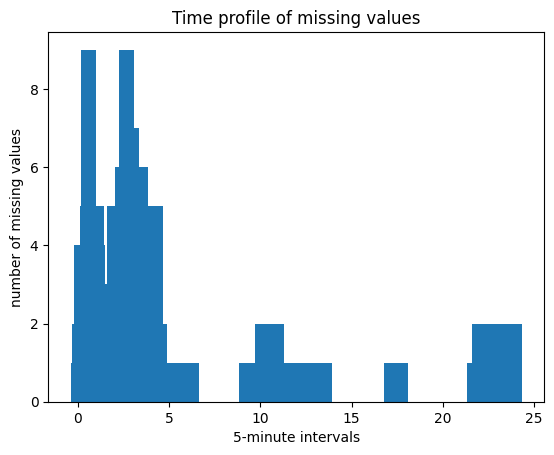

In [49]:
nans_per_time = np.sum(np.isnan(vectorized_day_dataset),0)
print(nans_per_time.shape)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# Create an array 'x_axis' representing the 5-minute intervals
x_axis = np.arange(0, nintvals, 1, dtype=int)
# Initialize an empty list 'x_axis_hours' to store time values in hours
x_axis_hours = []
# Convert interval indices to hours and append them to 'x_axis_hours'
for i in range(0, len(x_axis)):
  x_axis_hours.append(float(x_axis[i]*5)/60)
ax.bar(x_axis_hours,height=nans_per_time)


ax.set_ylabel('number of missing values')
ax.set_xlabel('5-minute intervals')
ax.set_title('Time profile of missing values')

plt.show()

Are these missing values associated with just a few days?

In [50]:
nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
print('number of days with missing value',np.size(np.where(nans_per_day > 0),1))

number of days with missing value 28


What does the data look like? What is the traffic pattern? Below is the script that can help you visualize all days where overlapping transparencies highlight some patterns. The black line is the average yearly flow for a time interval.

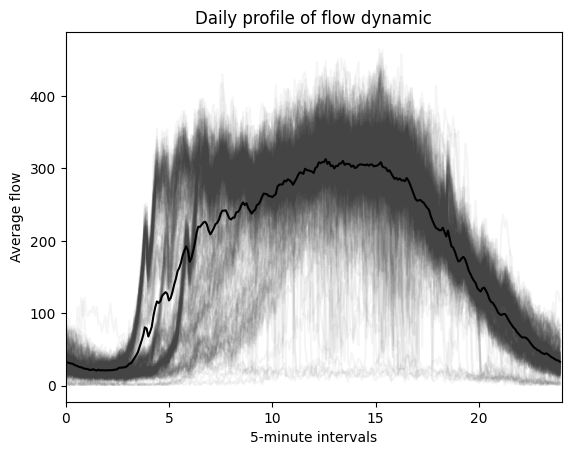

In [51]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()# a convenient way to create a new figure and a set of subplots.
ax.plot(np.array([x_axis_hours,]*ndays).transpose(),vectorized_day_dataset.transpose(),color='#444444',alpha=0.05)
# Above line plots the dataset with specified color and transparency.
ax.plot(x_axis_hours,np.transpose(np.nanmean(vectorized_day_dataset,0)),color='black')
# Above line plots the average of the dataset in black color.
ax.set_ylabel('Average flow')
ax.set_xlabel('5-minute intervals')
plt.xlim(0,24)
ax.set_title('Daily profile of flow dynamic')

plt.show()

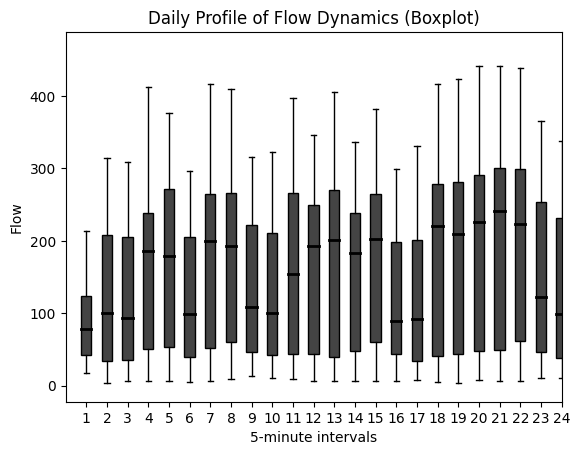

In [52]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()  # This line is a convenient way to create a new figure and a set of subplots.

# Create a boxplot for the dataset
boxplot = ax.boxplot(vectorized_day_dataset.T, patch_artist=True)

# Customize the boxplot appearance
for patch in boxplot['boxes']:
    patch.set_facecolor('#444444')  # Set the box color to gray
for median in boxplot['medians']:
    median.set(color='black', linewidth=2)  # Set median line color to black

# Set the y-axis label
ax.set_ylabel('Flow')

# Set the x-axis label
ax.set_xlabel('5-minute intervals')

# Set the x-axis limits to be between 0 and 24
plt.xlim(0, 24)

# Set the title of the plot
ax.set_title('Daily Profile of Flow Dynamics (Boxplot)')

# Display the plot
plt.show()

Some patterns are obvious, and we could expect some peak and weekend patterns. Thus, a simple thing to do is look at day-of-week patterns, done below.

In [53]:
import datetime

# Create an array 'day_of_week' to store the day of the week for each unique date
day_of_week = np.zeros((ndays))

# Loop through each unique date
for i in range(0, ndays):
    # Parse the current date from a string to a datetime object
    day_dt = datetime.datetime.strptime(str(days[i]), '%Y%m%d')

    # Get the day of the week (1 for Monday, 2 for Tuesday, ..., 7 for Sunday)
    day_of_week[i] = day_dt.isoweekday()

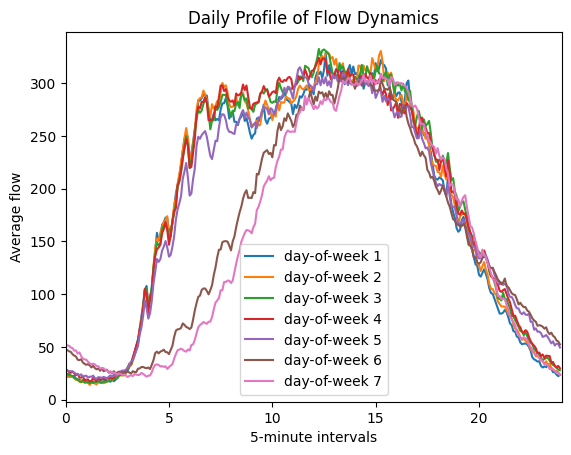

In [54]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()

# Iterate through each day of the week (from 1 to 7)
for i in range(1, 8):
    # Find the indices of days that correspond to the current day of the week
    day_of_week_index_t = np.where(day_of_week == i)

    # Calculate the number of days that match the current day of the week
    ndays_t = np.size(day_of_week_index_t[0])

    # Plot the average flow for the current day of the week
    ax.plot(x_axis_hours,
            np.nanmean(vectorized_day_dataset[day_of_week_index_t[0], :].transpose(), 1),
            label='day-of-week ' + str(i))
    # This line plots the average flow for the current day of the week.
    # 'np.nanmean()' calculates the mean while handling NaN values.

# Set the y-axis label
ax.set_ylabel('Average flow')

# Set the x-axis label
ax.set_xlabel('5-minute intervals')

# Set the x-axis limits to be between 0 and 24
plt.xlim(0, 24)

# Set the title of the plot
ax.set_title('Daily Profile of Flow Dynamics')

# Add a legend indicating the day of the week
ax.legend()

# Display the plot
plt.show()

The day's index is from 1 - 7, where 1 is Monday. To our expectations, we can see the difference between weekdays and weekends. However, some patterns from the previous plot are missing here and may include seasonal, holiday, and incident impacts on observations. This we explore with clustering in the next part of the exercise.

## Preprocess evaluation dataset

In [55]:
data_eval_df=pd.read_csv('gdrive/My Drive/Clustering_data/evaluation_dataset_exercise_5_clustering_highway_traffic.csv',sep=';')
data_eval_df

PORTAL      Date time_from   time_to  Interval_5  SPEED_MS_AVG  \
0      E4S 56,780  20220108  00:00:00  00:05:00           0         16.74   
1      E4S 56,780  20220108  00:05:00  00:10:00           1         17.57   
2      E4S 56,780  20220108  00:10:00  00:15:00           2         16.94   
3      E4S 56,780  20220108  00:15:00  00:20:00           3         17.50   
4      E4S 56,780  20220108  00:20:00  00:25:00           4         16.21   
...           ...       ...       ...       ...         ...           ...   
22939  E4S 56,780  20221230  23:35:00  23:40:00         283         19.83   
22940  E4S 56,780  20221230  23:40:00  23:45:00         284         19.01   
22941  E4S 56,780  20221230  23:45:00  23:50:00         285         19.72   
22942  E4S 56,780  20221230  23:50:00  23:55:00         286         20.64   
22943  E4S 56,780  20221230  23:55:00  24:00:00         287         20.23   

       flow  
0        35  
1        29  
2        32  
3        27  
4        31  
...     ...  
22939    43  
22940    35  
22941    45  
22942    49  
22943    38  

[22944 rows x 7 columns]

In [56]:
# Read the evaluation dataset from a CSV file
#data_eval_df = pd.read_csv("evaluation_dataset_exercise_5_clustering_highway_traffic.csv", sep=";")

# Sort the evaluation DataFrame by columns "Date" and "Interval_5"
data_eval_df.sort_values(["Date", "Interval_5"])

# Extract unique dates from the sorted evaluation DataFrame
days_eval = np.unique(data_eval_df[['Date']].values.ravel())
# Calculate the total number of unique days in the evaluation dataset
ndays_eval = len(days_eval)

# Group the evaluation DataFrame by the "Date" column
day_eval_subsets_df = data_eval_df.groupby(["Date"])

# Initialize a matrix 'vectorized_day_dataset_eval' filled with NaN values
vectorized_day_dataset_eval = np.zeros((ndays_eval, nintvals))
vectorized_day_dataset_eval.fill(np.nan)
# This section initializes a 2D array to store the evaluation dataset and fills it with NaN values.

# Loop through each unique day in the evaluation dataset
for i in range(0, ndays_eval):
    # Get the DataFrame corresponding to the current day
    df_t = day_eval_subsets_df.get_group(days_eval[i])

    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame (this line is redundant)
        df_t = day_eval_subsets_df.get_group(days_eval[i])

        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset_eval'
        vectorized_day_dataset_eval[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

# Print the resulting 'vectorized_day_dataset_eval'
print(vectorized_day_dataset_eval)

[[35. 29. 32. ... 62. 66. 71.]
 [44. 44. 51. ... 30. 31. 23.]
 [21. 22. 17. ... 20. 22. 22.]
 ...
 [17. 17. 20. ... 35. 25. 27.]
 [37. 25. 30. ... 37. 36. 49.]
 [42. 28. 32. ... 45. 49. 38.]]


In [57]:
# Calculate the total number of NaN values in the evaluation dataset
print('Number of NaNs:', np.sum(np.isnan(vectorized_day_dataset_eval)))

# Calculate the rate of NaN values in the evaluation dataset
print('Rate of NaNs:', np.sum(np.isnan(vectorized_day_dataset_eval)) / (ndays_eval * nintvals))

# Calculate the number of days with missing values
nans_per_day_eval = np.sum(np.isnan(vectorized_day_dataset_eval), 1)
print('Number of days with missing values:', np.size(np.where(nans_per_day_eval > 0)))

# Filter out days with no missing values and create a new dataset
vectorized_day_dataset_no_nans_eval = vectorized_day_dataset_eval[np.where(nans_per_day_eval == 0)[0], :]
days_not_nans_eval = days_eval[np.where(nans_per_day_eval == 0)[0]]

# Calculate the final number of days in the evaluation dataset after removing missing values
print('Final number of days in evaluation dataset:', len(days_not_nans_eval))

# Print the list of days in the evaluation dataset with no missing values
print('List of days without missing values:', days_not_nans_eval)

# Calculate the total number of days in the filtered evaluation dataset
ndays_eval_not_nans = len(days_not_nans_eval)

Number of NaNs: 96
Rate of NaNs: 0.004166666666666667
Number of days with missing values: 11
Final number of days in evaluation dataset: 69
List of days without missing values: [20220108 20220109 20220131 20220204 20220209 20220210 20220211 20220223
 20220226 20220227 20220302 20220304 20220305 20220306 20220310 20220314
 20220315 20220321 20220323 20220326 20220403 20220406 20220416 20220418
 20220421 20220422 20220425 20220427 20220428 20220503 20220505 20220514
 20220519 20220521 20220522 20220526 20220530 20220601 20220603 20220609
 20220616 20220619 20220623 20220628 20220704 20220711 20220712 20220904
 20220910 20220911 20220920 20220921 20220925 20220927 20220929 20220930
 20221005 20221022 20221024 20221114 20221116 20221121 20221122 20221213
 20221216 20221218 20221220 20221223 20221230]


Function used in external evaluation

In [58]:
def find_the_closest_centroid(centroids, new_day, from_interval: int, to_interval: int):
    closest_centroid = None
    closest_dist = None

    # Iterate through each centroid
    for i in range(0, len(centroids)):
        # Calculate the Euclidean distance between the centroid and the new data point
        ed_t = dis_lib.paired_distances(centroids[i], new_day, metric='euclidean')

        # Check if the current centroid is closer than the previously closest one
        if closest_centroid is None or closest_dist > ed_t:
            closest_centroid = i
            closest_dist = ed_t

    return closest_centroid

## Clustering

In [59]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
# Import the pairwise_distances function from scikit-learn's metrics library
import sklearn.metrics.pairwise as dis_lib

In [60]:
#Do we have missing values?
print(np.where(nans_per_day > 0)[0])

[ 25  49  52  86  87  88 137 138 139 185 187 207 208 209 217 247 248 249
 250 251 266 275 276 277 299 306 311 341]


*** The functions below visualizes the clusters in a calendar and Day-time patterns ***

In [61]:
from dateutil.relativedelta import relativedelta
from matplotlib.patches import Polygon
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib import colors

def assign_colors(n_clusters, days, assigments):

    days_colors = []
    color_to_cluster = []
    style_to_cluster = []
    weekend_colors = ['#67001f','#d6604d','#fdae61','#f46d43','#d53e4f','#9e0142','#f768a1','#f1c232']#,'#fe9929','#cc4c02','#e31a1c','#737373','#bdbdbd','#252525','#bcbddc']
#    weekend_school_colors = ['#c2a5cf','#f1b6da','#8e0152','#c51b7d','#de77ae','#ae017e','#fcc5c0','#e31a1c','#737373','#bdbdbd']
#    bank_holidays_colors = ['#543005','#dfc27d','#bf812d','#8c510a']
    mixed_colors = ['#4d4d4d','#35978f','#bababa','#878787']
    weekday_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#cab2d6','#6a3d9a','#b15928','#8dd3c7','#bebada','#fb8072','#b3de69','#bc80bd','#fccde5','#ccebc5','#35978f','#80cdc1']

    cluster_id_weekdays_share = []
    cluster_id_weekend_share = []
    cluster_id_all_days = []

    for i in range(0,n_clusters):
        color_to_cluster.append(None)
        style_to_cluster.append(None)
        cluster_id_weekdays_share.append(0)
        cluster_id_weekend_share.append(0)
        cluster_id_all_days.append(0)

    for i in range(0,len(days)):
        #print(i,assigments[i],len(assigments),len(cluster_id_all_days))
        if assigments[i] is not None:
            cluster_id_all_days[assigments[i]] += 1
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')

            if int(pomT.weekday()) < 5:
                cluster_id_weekdays_share[assigments[i]] += 1
            else:
                cluster_id_weekend_share[assigments[i]] += 1

    print('cluster_id_weekdays_share',cluster_id_weekdays_share)
    print('cluster_id_weekend_share',cluster_id_weekend_share)
    for i in range(0,len(days)):
        if assigments[i] is not None:
            cluster_idx = assigments[i]
            if '-' in str(days[i]):
                pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
            else:
                pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
            if color_to_cluster[assigments[i]] is None:
                if cluster_id_weekend_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekend_colors.pop()
                        style_to_cluster[assigments[i]] = ':'
                elif cluster_id_weekdays_share[cluster_idx] / float(cluster_id_all_days[cluster_idx]) > 0.6:
                        color_to_cluster[assigments[i]] = weekday_colors.pop(0)
                        style_to_cluster[assigments[i]] = '-'
                else:
                    color_to_cluster[assigments[i]] = mixed_colors.pop()
                    style_to_cluster[assigments[i]] = ':'

            days_colors.append(color_to_cluster[assigments[i]])
        else:
            days_colors.append(None)

    return days_colors,color_to_cluster,style_to_cluster


def calmap(ax, year, data, days, assigments, n_clusters,days_colors,color_to_cluster,
           limit_graphics=False):

    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders

    xticks, labels = [], []
    start = datetime.datetime(year,1,1).weekday()

    for month in range(1,13):

        first = datetime.datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]

        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",

                       linewidth=1, zorder=20, clip_on=False)

        ax.add_artist(poly)

    line = Line2D([0,53],[5,5],linewidth=1, zorder = 20,color="black",linestyle='dashed')
    ax.add_artist(line)

    if not limit_graphics:
        ax.set_xticks(xticks)
        ax.set_xticklabels(labels)
        ax.set_yticks(0.5 + np.arange(7))
        ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
        ax.set_title("{}".format(year), weight="semibold")
    else:
        plt.tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
        plt.tick_params(
            axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            left=False,      # ticks along the bottom edge are off
            right=False,         # ticks along the top edge are off
            labelleft=False)

    # Clearing first and last day from the data
    valid = datetime.datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime.datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    for i in range(0,len(days)):
        if '-' in str(days[i]):
            pomT = datetime.datetime.strptime(str(days[i]),'%Y-%m-%d')
        else:
            pomT = datetime.datetime.strptime(str(days[i]),'%Y%m%d')
        week_number = int(pomT.strftime("%W"))
        day_of_week = int(pomT.weekday())
        data[day_of_week,week_number] = assigments[i]


    act_date = datetime.datetime(year,1,1)
    while (act_date.year == year):

        week_number = int(act_date.strftime("%W"))
        day_of_week = int(act_date.weekday())
        doy_id = act_date.timetuple().tm_yday
        if doy_id<5 and week_number > 53:
            week_number = 0

        act_date = act_date + datetime.timedelta(days=1)

    #pomT = datetime.datetime.strptime('2017-01-01','%Y-%m-%d')
    #week_number = int(pomT.strftime("%V"))
    #day_of_week = int(pomT.weekday())
    #print(week_number,day_of_week)
    #doy_id = pomT.timetuple().tm_yday
    #if doy_id<5 and week_number > 0:
    #    week_number = 0
    #data[day_of_week,week_number] = len(clusters)+10

    # Showing data
    cmap = plt.cm.spring  # Can be any colormap that you want after the cm
    cmap.set_bad(color='white')

    #ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=0, vmax=len(clusters)+10,
    #          cmap=cmap, origin="lower", alpha=.75)

    cmap = colors.ListedColormap(color_to_cluster)
    bounds=[-0.1]
    step = 1
    for i in range(0,n_clusters):
        bounds.append(i-0.1+step)
    norm = colors.BoundaryNorm(bounds, cmap.N)
    #print(color_to_cluster)
   #print(bounds)
    #print(norm)

    #print(color_to_cluster)
    #print(bounds)
    #print(cmap)
    #exit(0)

    ax.imshow(data, extent=[0,53,0,7], zorder=10, interpolation='nearest', origin='lower',cmap=cmap, norm=norm)

def make_calendar_visualization_figure(days,assigments,n_clusters,years,days_colors,color_to_cluster,
                                       save_figure: str = None, show_figure:bool = True, limit_graphics = False):

    fig = plt.figure(figsize=(8,1.5*len(years)), dpi=100)
    X = np.linspace(-1,1, 53*7)

    for i, obj in enumerate(years):

        pom_s = str(len(years))+'1'+str(i+1)
        print(pom_s)

        ax = plt.subplot(int(pom_s), xlim=[0, 53], ylim=[0, 7], frameon=False, aspect=1)
        I = 1.2 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
        I = I.reshape(53,7).T
        I.fill(np.nan)
        calmap(ax, int(obj), I.reshape(53,7).T, days, assigments, n_clusters,days_colors,color_to_cluster, limit_graphics)

    #   ax = plt.subplot(212, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #  I = 1.1 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #   calmap(ax, 2018, I.reshape(53,7).T)

    #ax = plt.subplot(313, xlim=[0,53], ylim=[0,7], frameon=False, aspect=1)
    #I = 1.0 - np.cos(X.ravel()) + np.random.normal(0,.2, X.size)
    #calmap(ax, 2019, I.reshape(53,7).T)
    if save_figure:
        plt.savefig(save_figure)

    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()


def make_figure_centroids(x,y,color_to_cluster,style_to_cluster,cluster_ids,minY = None,maxY = None,
                          save_figure: str = None, show_figure:bool = True):

    #print(color_to_cluster)
    fig = plt.figure(figsize=(8,3))
    ax = fig.add_subplot(111)
    for i in range(0,len(x)):
        #print(i,color_to_cluster[i],style_to_cluster[i])
        #print(y[i])
        ax.plot(x[i],y[i],style_to_cluster[i], color=color_to_cluster[i], label=str(cluster_ids[i]))
    ax.set_xlabel('Time of day')
    ax.set_ylabel('Flow')
    if minY is not None and maxY is not None:
        ax.set_ylim([minY, maxY])
    plt.legend()

    if save_figure:
        plt.savefig(save_figure)

    if show_figure or save_figure is None:
        plt.tight_layout()
        plt.show()

# This function 'make_calendar_visualization_figure' is used to generate a visualization based on the provided data and parameters.
# 'days_not_nans' are the days, 'cluster_labels' are the cluster labels, 'n_clusters_t' is the number of clusters,
# '[2021]' represents the year, 'days_colors' represent the assigned colors for each day, 'color_to_cluster' maps colors to clusters,
# and 'save_figure' is an optional parameter to save the generated figure (can be None if not saving).


## K-MEANS CLUSTERING

Number of clusters = 6
cluster_id_weekdays_share [62, 9, 85, 73, 1, 6]
cluster_id_weekend_share [0, 57, 0, 0, 2, 42]
111


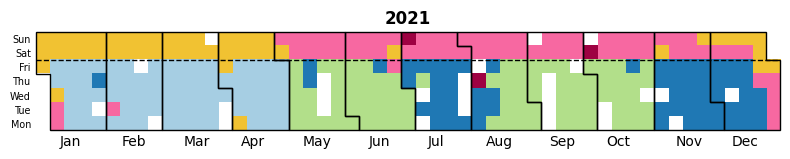

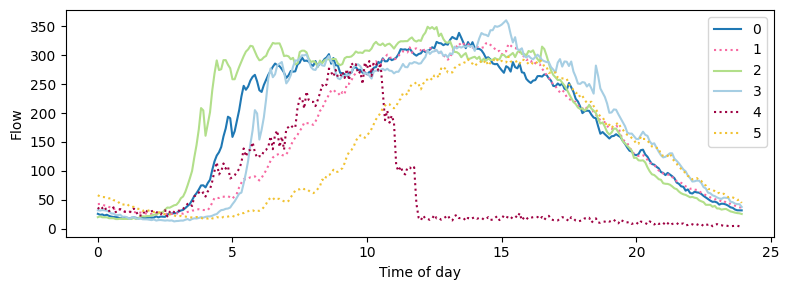



Number of clusters = 7
cluster_id_weekdays_share [39, 8, 81, 73, 1, 6, 28]
cluster_id_weekend_share [0, 57, 0, 0, 2, 42, 0]
111


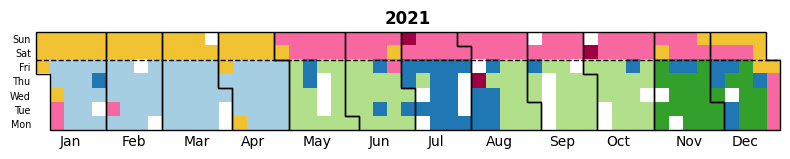



Number of clusters = 8
cluster_id_weekdays_share [32, 4, 79, 70, 6, 10, 34, 1]
cluster_id_weekend_share [0, 43, 0, 0, 39, 17, 0, 2]
111


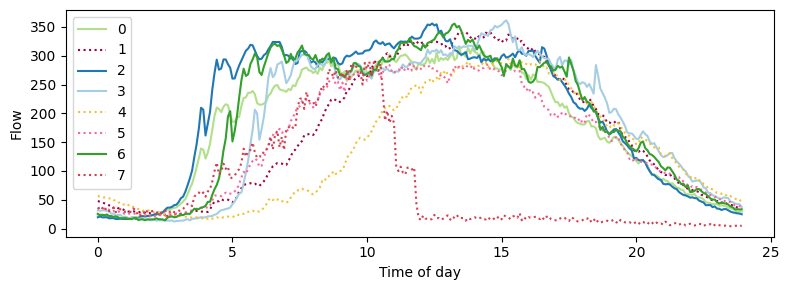



Number of clusters = 9
cluster_id_weekdays_share [28, 4, 65, 70, 6, 10, 34, 1, 18]
cluster_id_weekend_share [0, 43, 0, 0, 39, 17, 0, 2, 0]
111


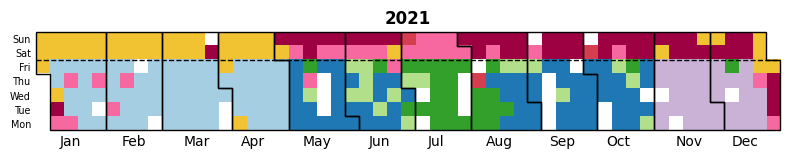

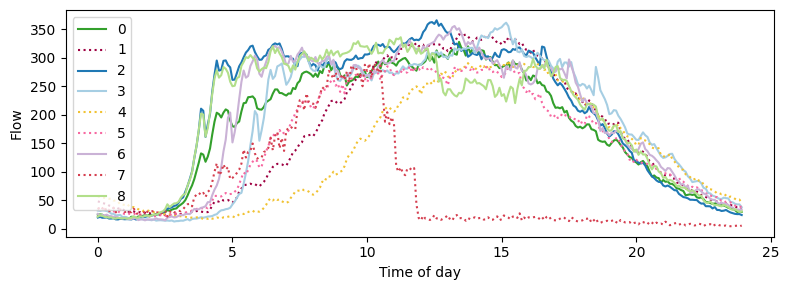



Number of clusters = 10
cluster_id_weekdays_share [26, 4, 66, 42, 6, 8, 34, 1, 18, 31]
cluster_id_weekend_share [0, 42, 0, 0, 39, 18, 0, 2, 0, 0]
111


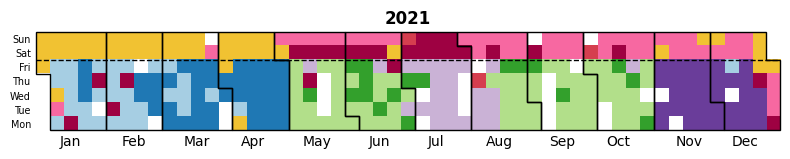

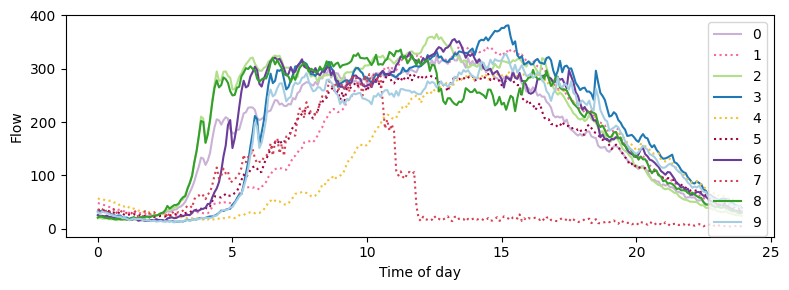



Number of clusters = 11
cluster_id_weekdays_share [26, 4, 66, 42, 5, 8, 34, 1, 18, 31, 1]
cluster_id_weekend_share [0, 35, 0, 0, 16, 13, 0, 2, 0, 0, 35]
111


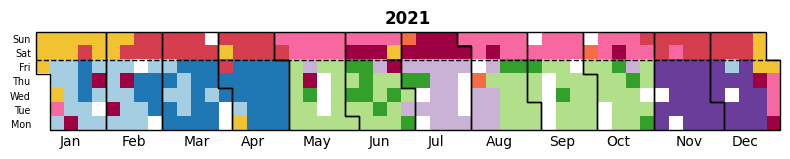

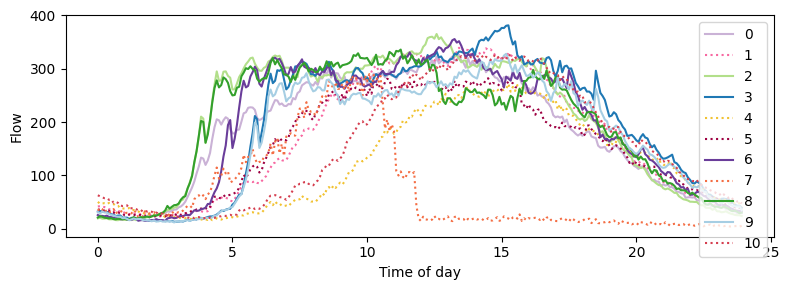



Number of clusters = 12
cluster_id_weekdays_share [27, 4, 64, 42, 5, 8, 34, 1, 18, 31, 1, 1]
cluster_id_weekend_share [0, 35, 0, 0, 16, 13, 0, 2, 0, 0, 35, 0]
111


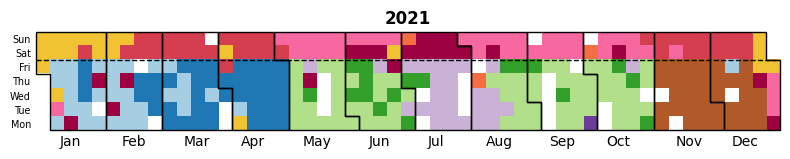

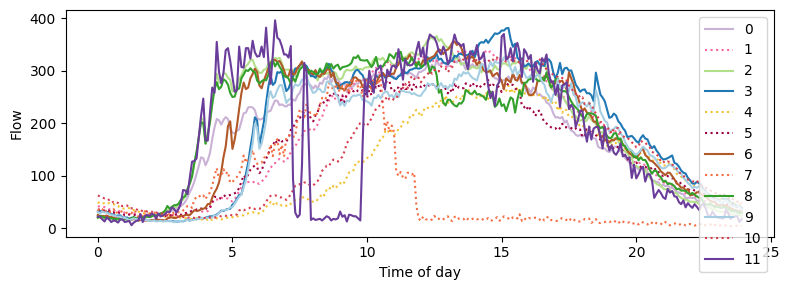

Nr of Clusters  Silhouette Score  Davies-Bouldin Score  \
0               6          0.239601              1.454940   
1               7          0.241332              1.481357   
2               8          0.224635              1.575806   
3               9          0.216715              1.676599   
4              10          0.188830              1.743424   
5              11          0.178876              1.724123   
6              12          0.180512              1.617700   

   Calinski-Harabasz Score        MAE      MAPE  
0               115.185215  25.954520  0.259981  
1               103.050630  25.326415  0.253731  
2                94.887785  24.814128  0.246713  
3                86.615548  24.553252  0.244439  
4                81.054500  24.607666  0.245318  
5                77.748236  23.623800  0.238078  
6                72.488151  23.352217  0.225660

In [62]:
#K-means
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
import pandas as pd

#remove days with missing values
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
days_not_nans = days[np.where(nans_per_day == 0)[0]]

evaluation_scores = []
#trying different number of clusters
for i in range(6,13):

  ##################################
  ##### CLUSTERING
  ##################################
  n_clusters = i
  clusters = None

  clusters = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

  if clusters is not None:
    cluster_labels = clusters.labels_

  #cluster_labels = GaussianMixture(n_components=n_clusters).fit(vectorized_day_dataset_no_nans).predict(vectorized_day_dataset_no_nans) #check the parameters at  https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_init.html#sphx-glr-auto-examples-mixture-plot-gmm-init-py
  print("Number of clusters = " + str(n_clusters))

  ######################################
  #### VISUALISATION
  #######################################

  ## Calendar visualisation

  # Assign colors to days based on clusters
  days_colors, color_to_cluster, style_to_cluster = assign_colors(n_clusters, days_not_nans, cluster_labels)

  # Create a calendar visualization figure
  make_calendar_visualization_figure(days_not_nans, cluster_labels, n_clusters, [2021], days_colors,
                                   color_to_cluster, save_figure=None)

  # Day-time profile

  # Initialize empty lists to store centroid data
  centroids_xx = []  # x-axis values for centroids
  centroids_yy_daytypes = []  # y-axis values for centroids, grouped by day types
  cluster_ids = []  # Cluster IDs

  # Iterate through each cluster
  for i in range(0, n_clusters):

    centroids_xx.append(x_axis_hours) # Store the x-axis values for centroids (hours of the day)

  # Calculate the y-axis values for centroids (average flow for each 5-minute interval)
    centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())
    centroids_yy_daytypes.append(centroid_yy)

    # Store the cluster ID
    cluster_ids.append(i)

  # Generate a figure displaying the centroids
  make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster, style_to_cluster, cluster_ids)

  print('\n')

  ########################################
  #### INTERNAL EVALUATION
  #######################################

  #Calc scores
  SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels) # Silhouette Score measures the quality of clusters, higher values indicate better separation.
  DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels) # Davies-Bouldin Score measures the average similarity between each cluster and its most similar cluster, lower values indicate better separation.
  CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels) # Calinski-Harabasz Score measures the ratio of between-cluster variance to within-cluster variance, higher values indicate better separation.

  #################################
  ### EXTERNAL EVALUATION
  #####################################

  # Initialize a list to store centroid data
  centroids = []

  # Calculate centroids for each cluster
  for i in range(0, n_clusters):
      centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).reshape(1, nintvals)
      centroids.append(centroid)

  # Define the number of past intervals to consider for classification
  n_past_intervals_for_classification = 5

  # Initialize variables to calculate accuracy metrics
  total_mae = 0
  total_mape = 0
  prediction_counts = 0
  # Loop through each day in the evaluation dataset with no missing values
  for i in range(0, ndays_eval_not_nans):
      # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
      for j in range(n_past_intervals_for_classification, nintvals - 1):
          # Find the closest centroid for the current data point
          centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

          # Predict the value for the next interval
          predicted_value = centroids[centroid_index][0, j + 1]

          # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
          mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
          mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

          # Accumulate MAE, MAPE, and count of predictions
          total_mae += mae_t
          total_mape += mape_t
          prediction_counts += 1

  evaluation_scores.append({
        'Nr of Clusters': n_clusters,
        'Silhouette Score': SC_score,
        'Davies-Bouldin Score': DB_score,
        'Calinski-Harabasz Score': CH_score,
        'MAE' : total_mae / prediction_counts,
        'MAPE' : total_mape / prediction_counts,
    })

# Make dataframe
evaluation_scores_df = pd.DataFrame(evaluation_scores)

# Display the DataFrame with all scores
evaluation_scores_df




# Agglomerative clustering

In [63]:
#If I want to plot visualisations
plot_vis=True
#plot_vis=False

Number of clusters = 6
cluster_id_weekdays_share [30, 38, 6, 71, 1, 90]
cluster_id_weekend_share [53, 0, 46, 0, 2, 0]
111


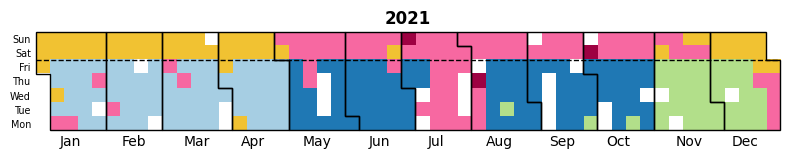



Number of clusters = 7
cluster_id_weekdays_share [38, 25, 6, 71, 1, 90, 5]
cluster_id_weekend_share [0, 11, 46, 0, 2, 0, 42]
111


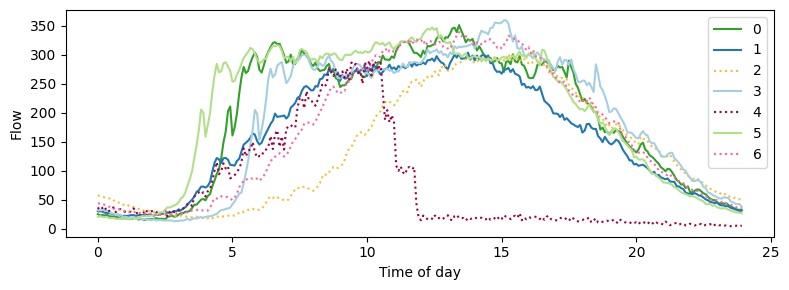



Number of clusters = 8
cluster_id_weekdays_share [6, 25, 90, 71, 1, 5, 5, 33]
cluster_id_weekend_share [46, 11, 0, 0, 2, 0, 42, 0]
111




Number of clusters = 9
cluster_id_weekdays_share [25, 71, 90, 3, 1, 5, 5, 33, 3]
cluster_id_weekend_share [11, 0, 0, 44, 2, 0, 42, 0, 2]
111


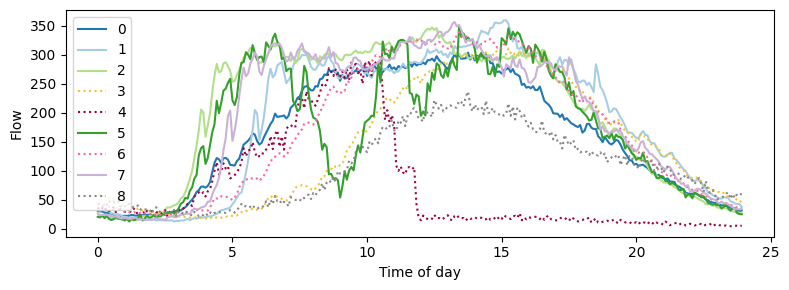



Number of clusters = 10
cluster_id_weekdays_share [71, 3, 90, 33, 8, 5, 5, 17, 3, 1]
cluster_id_weekend_share [0, 44, 0, 0, 11, 0, 42, 0, 2, 2]
111


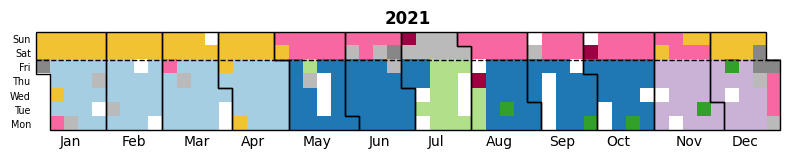

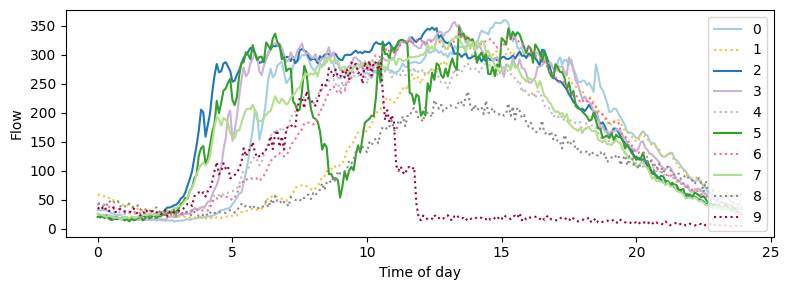



Number of clusters = 11
cluster_id_weekdays_share [90, 3, 5, 33, 8, 28, 5, 17, 3, 1, 43]
cluster_id_weekend_share [0, 44, 0, 0, 11, 0, 42, 0, 2, 2, 0]
111


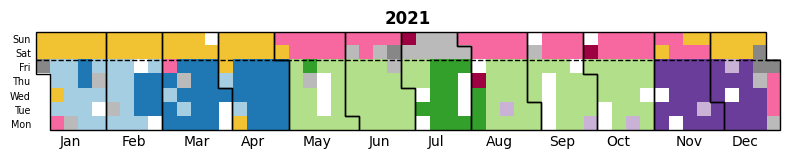

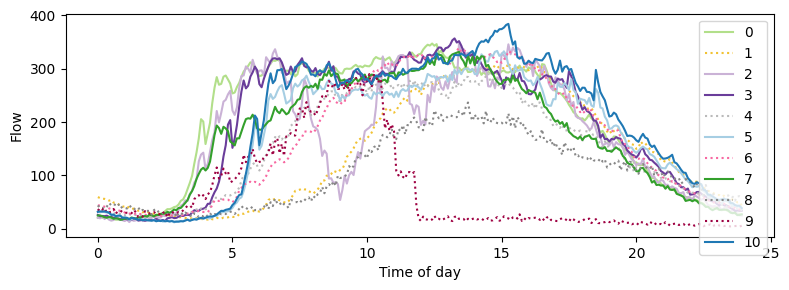



Number of clusters = 12
cluster_id_weekdays_share [3, 33, 5, 32, 8, 28, 5, 17, 3, 1, 43, 58]
cluster_id_weekend_share [44, 0, 0, 0, 11, 0, 42, 0, 2, 2, 0, 0]
111




Linkage = ward
 Nr of Clusters  Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score       MAE     MAPE
              6          0.250363              1.460171               108.679506 25.837365 0.252137
              7          0.243157              1.513606               100.749684 24.767895 0.250174
              8          0.239635              1.440534                91.736572 24.801210 0.239612
              9          0.233039              1.390687                84.412420 24.434278 0.236757
             10          0.215062              1.415068                78.955196 24.122647 0.232926
             11          0.192062              1.540013                74.390703 24.122647 0.232926
             12          0.173415              1.793704                70.408141 23.869704 0.231312


Number of clusters = 6
cluster_id_weekdays_share [86, 141, 3, 1, 2, 3]
cluster_id_weekend_share [46, 0, 51, 2, 0, 2]
111


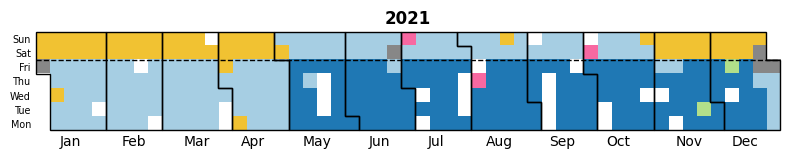

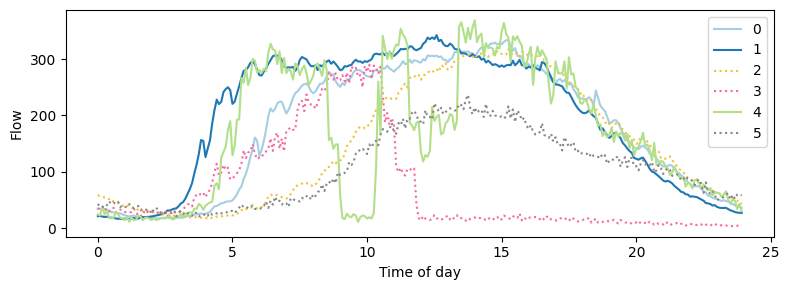



Number of clusters = 7
cluster_id_weekdays_share [141, 11, 3, 1, 2, 3, 75]
cluster_id_weekend_share [0, 11, 51, 2, 0, 2, 35]
111


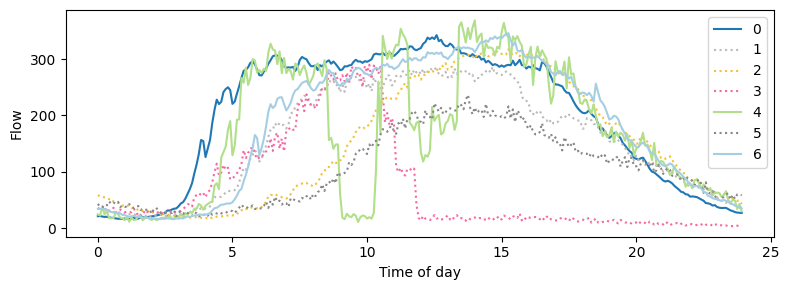



Number of clusters = 8
cluster_id_weekdays_share [138, 11, 3, 3, 2, 3, 75, 1]
cluster_id_weekend_share [0, 11, 51, 0, 0, 2, 35, 2]
111


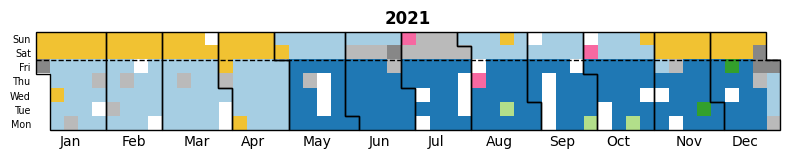

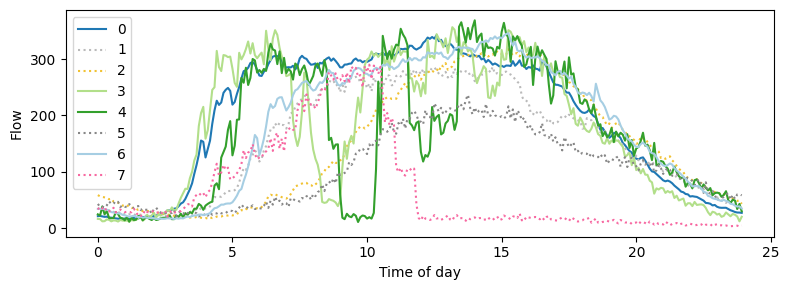



Number of clusters = 9
cluster_id_weekdays_share [11, 137, 3, 3, 2, 3, 75, 1, 1]
cluster_id_weekend_share [11, 0, 51, 0, 0, 2, 35, 2, 0]
111


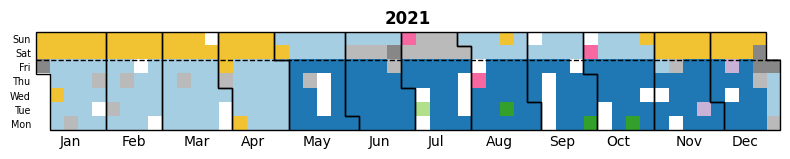

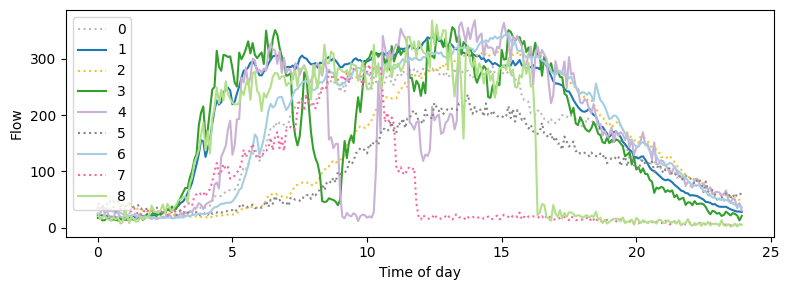



Number of clusters = 10
cluster_id_weekdays_share [137, 10, 3, 3, 2, 3, 75, 1, 1, 1]
cluster_id_weekend_share [0, 11, 51, 0, 0, 2, 35, 2, 0, 0]
111


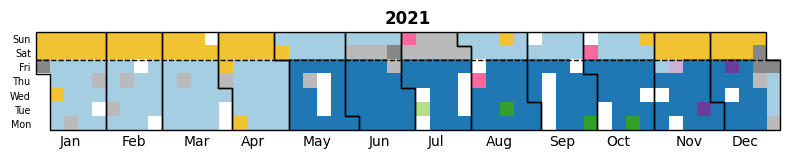

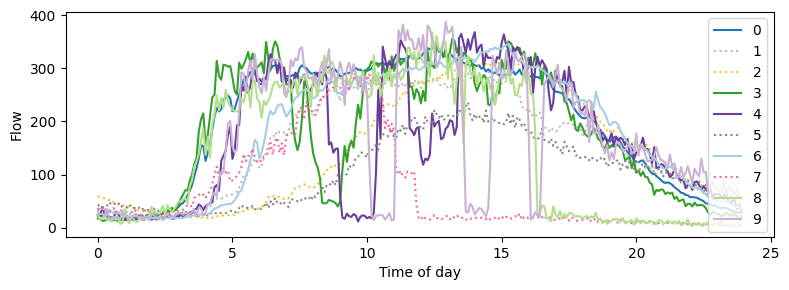



Number of clusters = 11
cluster_id_weekdays_share [10, 2, 3, 3, 131, 3, 75, 1, 1, 1, 6]
cluster_id_weekend_share [11, 0, 51, 0, 0, 2, 35, 2, 0, 0, 0]
111


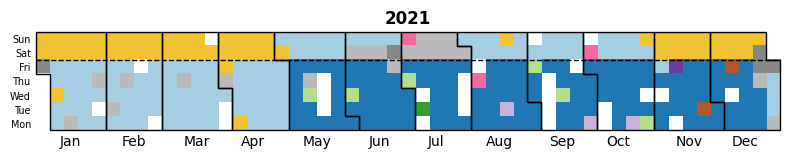



Number of clusters = 12
cluster_id_weekdays_share [2, 131, 3, 3, 6, 3, 75, 1, 1, 1, 8, 2]
cluster_id_weekend_share [0, 0, 51, 0, 0, 2, 35, 2, 0, 0, 11, 0]
111




Linkage = complete
 Nr of Clusters  Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score       MAE     MAPE
              6          0.271532              1.065297                85.693040 29.614943 0.287749
              7          0.240444              1.291067                77.452668 28.586034 0.283593
              8          0.230908              1.295486                68.788486 28.389875 0.284710
              9          0.231859              1.201186                61.437710 28.391118 0.284906
             10          0.224359              1.100544                56.130817 28.382508 0.284298
             11          0.192344              1.287132                51.866384 28.199726 0.282965
             12          0.183548              1.258370                47.943597 28.088190 0.282012


Number of clusters = 6
cluster_id_weekdays_share [225, 1, 7, 1, 1, 1]
cluster_id_weekend_share [47, 2, 52, 0, 0, 0]
111


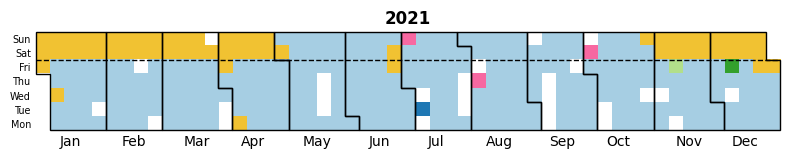

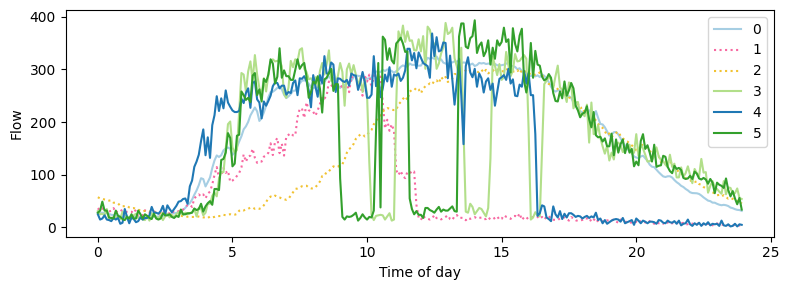



Number of clusters = 7
cluster_id_weekdays_share [7, 1, 4, 1, 1, 1, 221]
cluster_id_weekend_share [52, 2, 0, 0, 0, 0, 47]
111


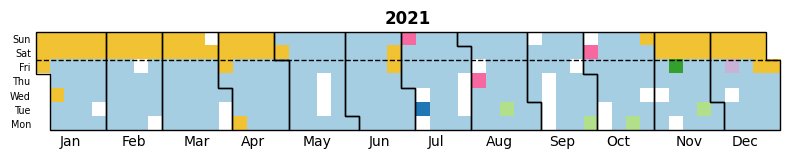

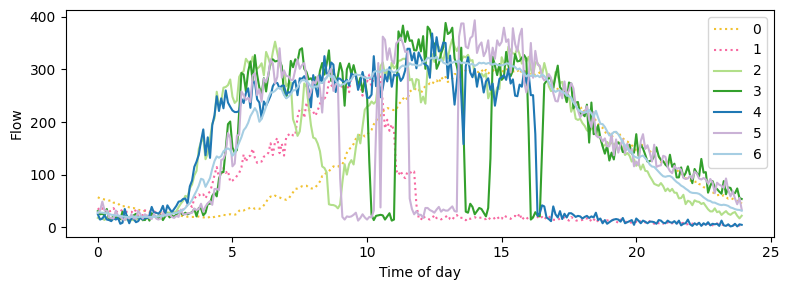



Number of clusters = 8
cluster_id_weekdays_share [4, 1, 221, 1, 1, 1, 6, 1]
cluster_id_weekend_share [0, 2, 47, 0, 0, 0, 52, 0]
111


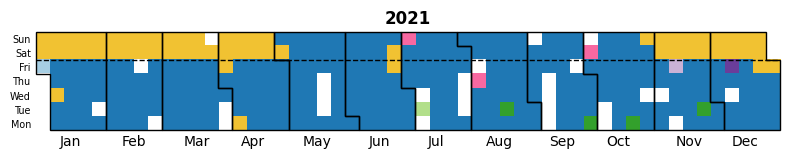



Number of clusters = 9
cluster_id_weekdays_share [221, 1, 3, 1, 1, 1, 6, 1, 1]
cluster_id_weekend_share [47, 2, 0, 0, 0, 0, 52, 0, 0]
111


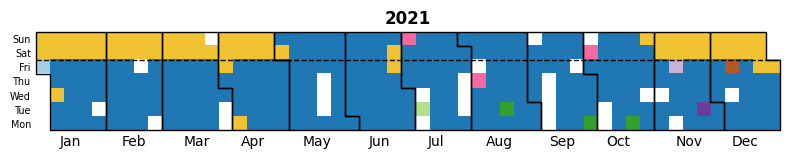

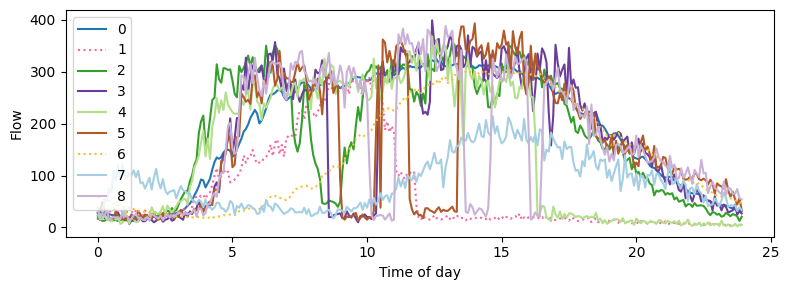



Number of clusters = 10
cluster_id_weekdays_share [138, 83, 3, 1, 1, 1, 6, 1, 1, 1]
cluster_id_weekend_share [0, 47, 0, 0, 2, 0, 52, 0, 0, 0]
111


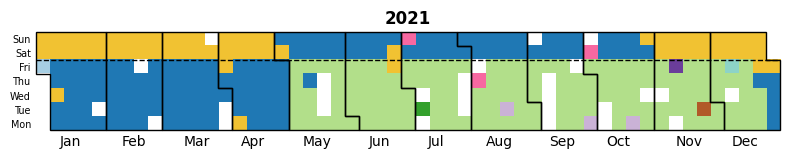

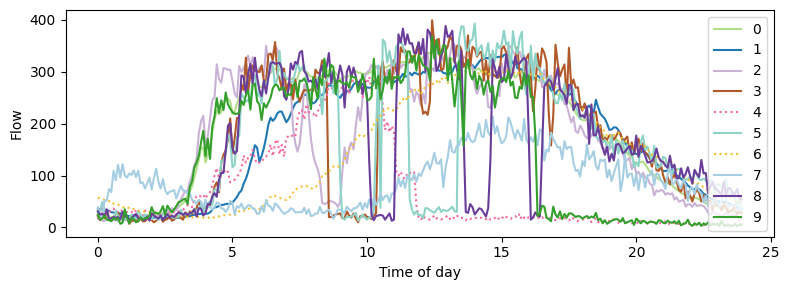



Number of clusters = 11
cluster_id_weekdays_share [83, 137, 3, 1, 1, 1, 6, 1, 1, 1, 1]
cluster_id_weekend_share [47, 0, 0, 0, 2, 0, 52, 0, 0, 0, 0]
111


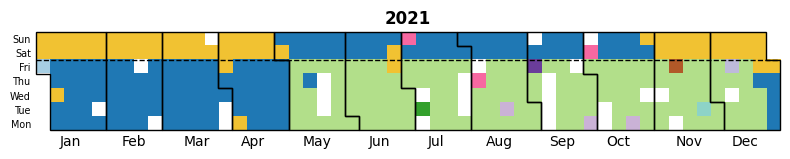

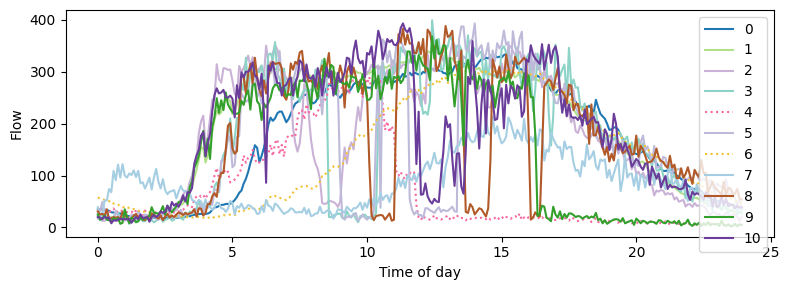



Number of clusters = 12
cluster_id_weekdays_share [82, 137, 3, 1, 1, 1, 6, 1, 1, 1, 1, 1]
cluster_id_weekend_share [47, 0, 0, 0, 2, 0, 52, 0, 0, 0, 0, 0]
111


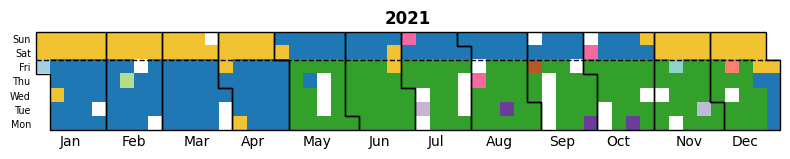

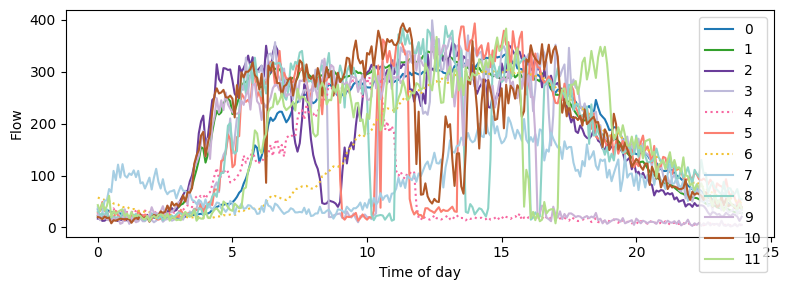



Linkage = average
 Nr of Clusters  Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score       MAE     MAPE
              6          0.250555              0.677413                38.222032 34.783774 0.330542
              7          0.236079              0.881330                33.604902 34.510983 0.319885
              8          0.215876              0.816518                29.507589 34.338979 0.326136
              9          0.197489              0.734935                26.182887 34.472895 0.324203
             10          0.268049              0.763470                51.205896 29.785638 0.294559
             11          0.256086              0.741626                46.721123 29.782255 0.294513
             12          0.244578              0.728313                42.966941 29.776496 0.294450


Number of clusters = 6
cluster_id_weekdays_share [231, 1, 1, 1, 1, 1]
cluster_id_weekend_share [99, 0, 2, 0, 0, 0]
111


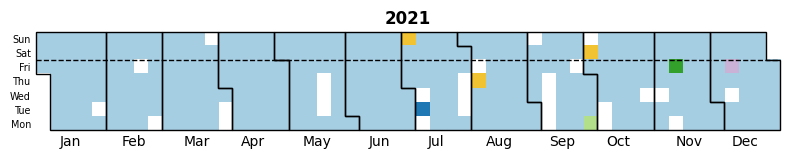

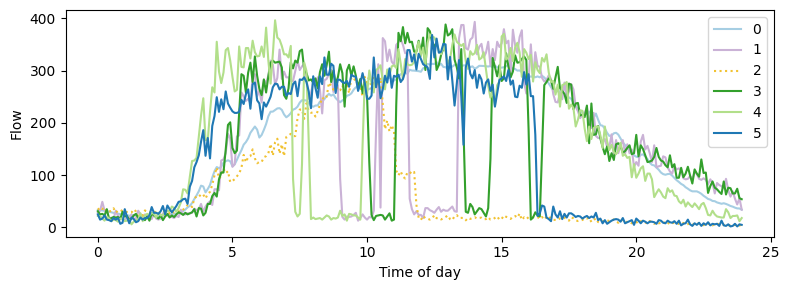



Number of clusters = 7
cluster_id_weekdays_share [230, 1, 1, 1, 1, 1, 1]
cluster_id_weekend_share [99, 0, 2, 0, 0, 0, 0]
111


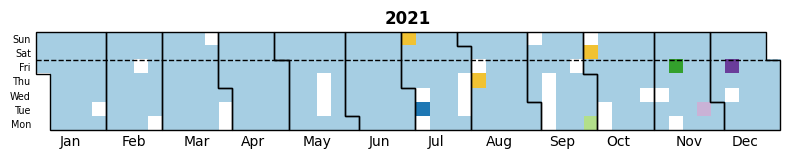

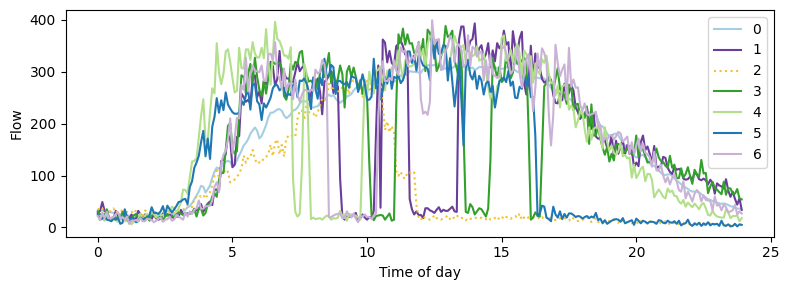



Number of clusters = 8
cluster_id_weekdays_share [229, 1, 1, 1, 1, 1, 1, 1]
cluster_id_weekend_share [99, 0, 2, 0, 0, 0, 0, 0]
111


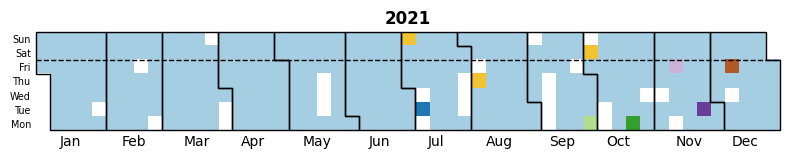

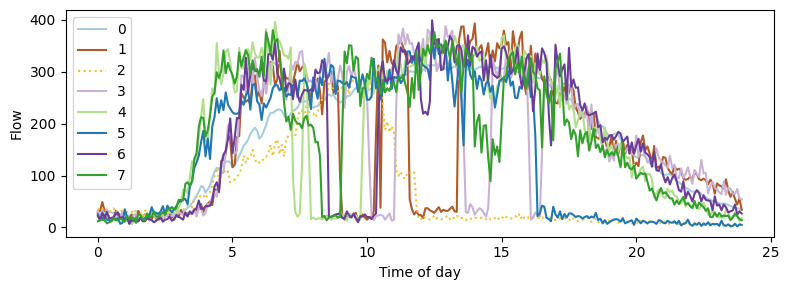



Number of clusters = 9
cluster_id_weekdays_share [1, 228, 1, 1, 1, 1, 1, 1, 1]
cluster_id_weekend_share [2, 99, 0, 0, 0, 0, 0, 0, 0]
111


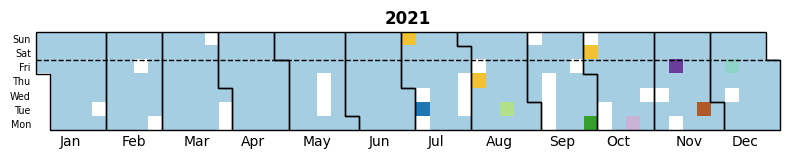

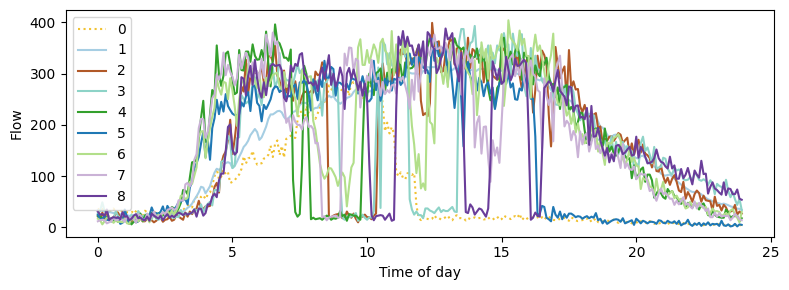



Number of clusters = 10
cluster_id_weekdays_share [228, 1, 1, 1, 1, 1, 1, 1, 1, 0]
cluster_id_weekend_share [99, 1, 0, 0, 0, 0, 0, 0, 0, 1]
111


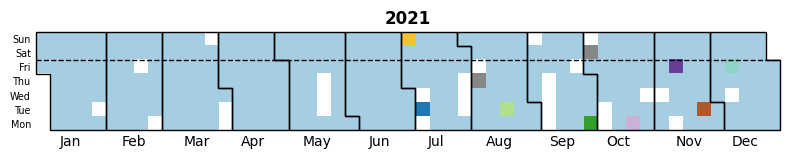

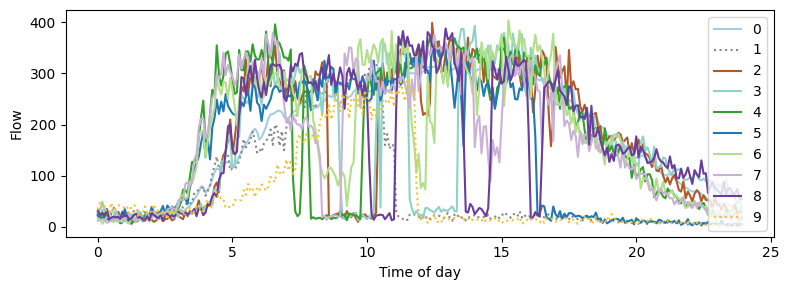



Number of clusters = 11
cluster_id_weekdays_share [227, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
cluster_id_weekend_share [99, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
111


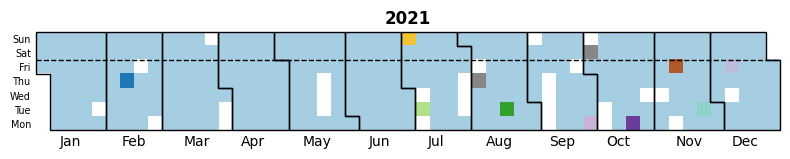

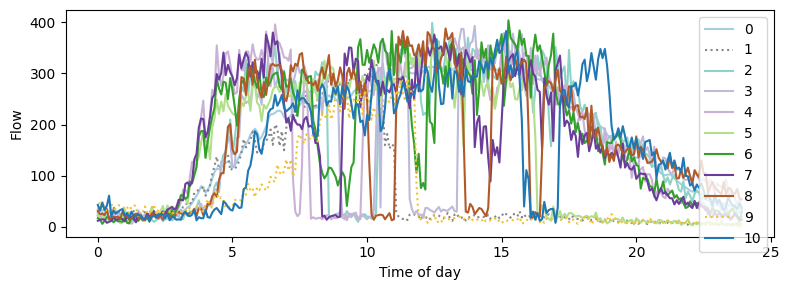



Number of clusters = 12
cluster_id_weekdays_share [226, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
cluster_id_weekend_share [99, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
111


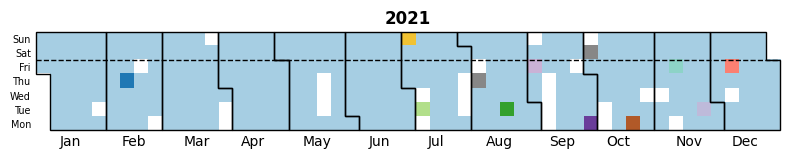

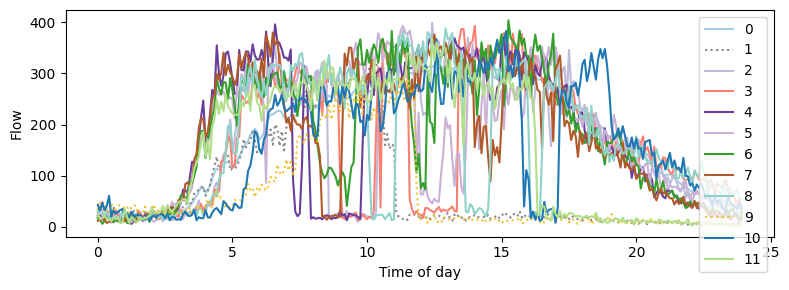



Linkage = single
 Nr of Clusters  Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score       MAE     MAPE
              6          0.216654              0.588250                 6.407091 40.182226 0.394002
              7          0.164776              0.624038                 5.646433 40.182720 0.394068
              8          0.124312              0.630323                 5.135800 40.192598 0.393783
              9          0.110279              0.650867                 4.694935 40.166910 0.393555
             10          0.105667              0.624024                 4.245613 40.104691 0.390867
             11          0.030322              0.639531                 3.976448 40.093788 0.390992
             12          0.024998              0.642377                 3.804156 39.820180 0.389095




In [69]:
#Agglomerative clustering

Linkage = ["ward",  "complete", "average", "single"]

for linkage in Linkage:

  evaluation_scores = []
  #trying different number of clusters
  for i in range(6,13):

    ##################################
    ##### CLUSTERING
    ##################################
    n_clusters = i
    clusters = None

    clusters = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage=linkage).fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

    if clusters is not None:
      cluster_labels = clusters.labels_

    #cluster_labels = GaussianMixture(n_components=n_clusters).fit(vectorized_day_dataset_no_nans).predict(vectorized_day_dataset_no_nans) #check the parameters at  https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_init.html#sphx-glr-auto-examples-mixture-plot-gmm-init-py


    ######################################
    #### VISUALISATION
    #######################################
    if plot_vis:

      print("Number of clusters = " + str(n_clusters))
    ## Calendar visualisation

      # Assign colors to days based on clusters
      days_colors, color_to_cluster, style_to_cluster = assign_colors(n_clusters, days_not_nans, cluster_labels)

      # Create a calendar visualization figure
      make_calendar_visualization_figure(days_not_nans, cluster_labels, n_clusters, [2021], days_colors, color_to_cluster, save_figure=None)

      # Day-time profile

      # Initialize empty lists to store centroid data
      centroids_xx = []  # x-axis values for centroids
      centroids_yy_daytypes = []  # y-axis values for centroids, grouped by day types
      cluster_ids = []  # Cluster IDs

      # Iterate through each cluster
      for i in range(0, n_clusters):

        centroids_xx.append(x_axis_hours) # Store the x-axis values for centroids (hours of the day)

        # Calculate the y-axis values for centroids (average flow for each 5-minute interval)
        centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())
        centroids_yy_daytypes.append(centroid_yy)

        # Store the cluster ID
        cluster_ids.append(i)

      # Generate a figure displaying the centroids
      make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster, style_to_cluster, cluster_ids)

      print('\n')

    ########################################
    #### INTERNAL EVALUATION
    #######################################

    #Calc scores
    SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels) # Silhouette Score measures the quality of clusters, higher values indicate better separation.
    DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels) # Davies-Bouldin Score measures the average similarity between each cluster and its most similar cluster, lower values indicate better separation.
    CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels) # Calinski-Harabasz Score measures the ratio of between-cluster variance to within-cluster variance, higher values indicate better separation.

    #################################
    ### EXTERNAL EVALUATION
    #####################################

    # Initialize a list to store centroid data
    centroids = []

    # Calculate centroids for each cluster
    for i in range(0, n_clusters):
        centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).reshape(1, nintvals)
        centroids.append(centroid)

    # Define the number of past intervals to consider for classification
    n_past_intervals_for_classification = 5

    # Initialize variables to calculate accuracy metrics
    total_mae = 0
    total_mape = 0
    prediction_counts = 0
    # Loop through each day in the evaluation dataset with no missing values
    for i in range(0, ndays_eval_not_nans):
        # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
        for j in range(n_past_intervals_for_classification, nintvals - 1):
            # Find the closest centroid for the current data point
            centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

            # Predict the value for the next interval
            predicted_value = centroids[centroid_index][0, j + 1]

            # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
            mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
            mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

            # Accumulate MAE, MAPE, and count of predictions
            total_mae += mae_t
            total_mape += mape_t
            prediction_counts += 1

    evaluation_scores.append({
          'Nr of Clusters': n_clusters,
          'Silhouette Score': SC_score,
          'Davies-Bouldin Score': DB_score,
          'Calinski-Harabasz Score': CH_score,
          'MAE' : total_mae / prediction_counts,
          'MAPE' : total_mape / prediction_counts,
      })


  # Make dataframe
  evaluation_scores_df = pd.DataFrame(evaluation_scores)

  print("Linkage = " + linkage)
  # Display the DataFrame with all scores
  print(evaluation_scores_df.to_string(index=False))
  print('\n')



## DBSCAN



In [65]:
plot_vis = True

Number of clusters = 17
cluster_id_weekdays_share [2, 6, 2, 2, 0, 10, 0, 2, 0, 0, 2, 2, 0, 0, 0, 3, 205]
cluster_id_weekend_share [31, 0, 0, 0, 15, 0, 3, 0, 3, 8, 0, 0, 3, 3, 2, 0, 33]
111


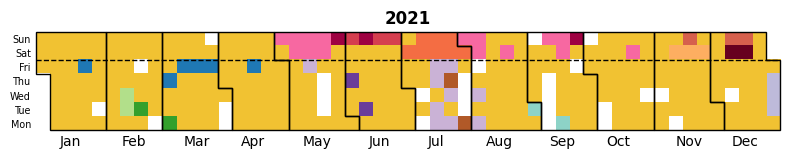

<ipython-input-66-261a17e2026b>:51: RuntimeWarning: Mean of empty slice
  centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())


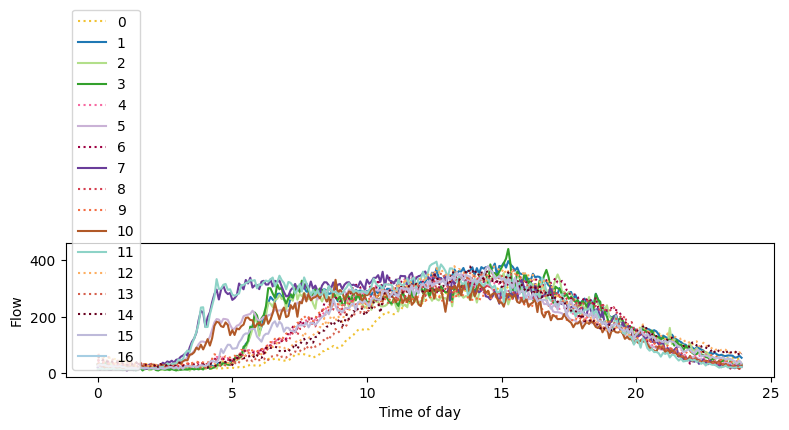



Prediction accuracy MAE: 26.32235495016556
Prediction accuracy MAPE: 0.3620834653044337
Epsilon = 450 & MinPts = 2
 Nr of Clusters  Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score       MAE     MAPE
             17          -0.27381               1.68844                 8.366911 26.322355 0.362083


Number of clusters = 7
cluster_id_weekdays_share [2, 37, 3, 32, 14, 3, 145]
cluster_id_weekend_share [44, 0, 35, 0, 0, 0, 22]
111


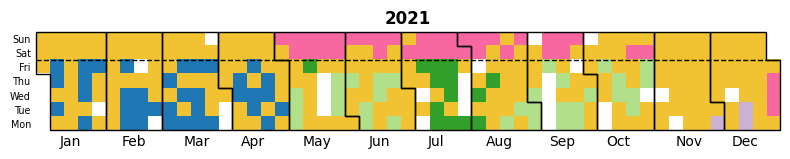

<ipython-input-66-261a17e2026b>:51: RuntimeWarning: Mean of empty slice
  centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())


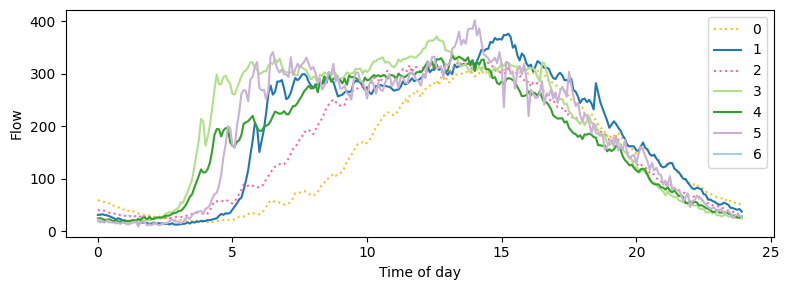



Prediction accuracy MAE: 26.23680191809368
Prediction accuracy MAPE: 0.35889508773131146
Epsilon = 500 & MinPts = 2
 Nr of Clusters  Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score       MAE     MAPE
              7         -0.027721              2.379572                35.327906 26.236802 0.358895


Number of clusters = 11
cluster_id_weekdays_share [2, 6, 0, 10, 0, 0, 0, 0, 0, 3, 215]
cluster_id_weekend_share [31, 0, 15, 0, 3, 3, 8, 3, 3, 0, 35]
111


<ipython-input-66-261a17e2026b>:51: RuntimeWarning: Mean of empty slice
  centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())




Prediction accuracy MAE: 31.454583725008362
Prediction accuracy MAPE: 0.38586348136732856
Epsilon = 450 & MinPts = 3
 Nr of Clusters  Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score       MAE     MAPE
             11         -0.197592              1.732171                12.233965 31.454584 0.385863


Number of clusters = 7
cluster_id_weekdays_share [2, 37, 3, 32, 14, 3, 145]
cluster_id_weekend_share [44, 0, 35, 0, 0, 0, 22]
111


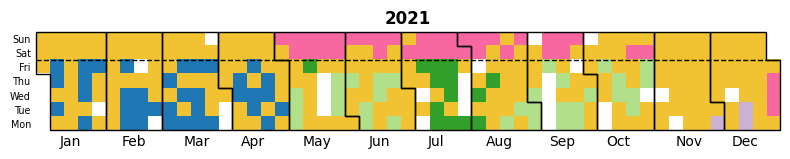

<ipython-input-66-261a17e2026b>:51: RuntimeWarning: Mean of empty slice
  centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())


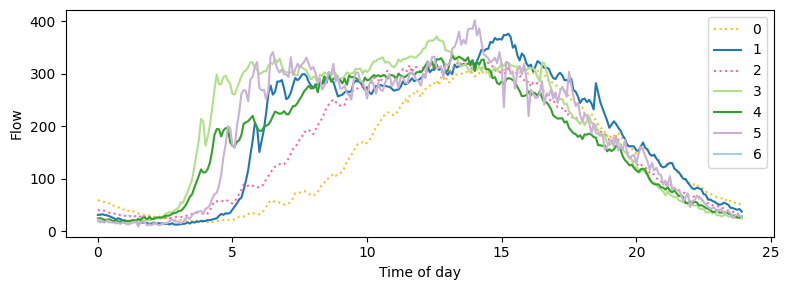



Prediction accuracy MAE: 26.23680191809368
Prediction accuracy MAPE: 0.35889508773131146
Epsilon = 500 & MinPts = 3
 Nr of Clusters  Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score       MAE     MAPE
              7         -0.027721              2.379572                35.327906 26.236802 0.358895




In [66]:
#DBSCAN
#FIX so the number of clusters is not set.
Min_Samp = [2,3]
for min_samp in Min_Samp:

  Eps = [450,500]
  for eps in Eps:

    evaluation_scores = []
    #trying different number of clusters
    for k in range(0,1): #only one since we are not controling the number of clusters.

      ##################################
      ##### CLUSTERING
      ##################################
      clusters = None

      clusters = DBSCAN(eps=eps, min_samples = min_samp).fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

      if clusters is not None:
        cluster_labels = clusters.labels_

      ######################################
      #### VISUALISATION
      #######################################
      if plot_vis:
        n_clusters = len(np.unique(cluster_labels))
        print("Number of clusters = " + str(n_clusters))
        ## Calendar visualisation

        # Assign colors to days based on clusters
        days_colors, color_to_cluster, style_to_cluster = assign_colors(n_clusters, days_not_nans, cluster_labels)

        # Create a calendar visualization figure
        make_calendar_visualization_figure(days_not_nans, cluster_labels, n_clusters, [2021], days_colors,
                                        color_to_cluster, save_figure=None)

        # Day-time profile

        # Initialize empty lists to store centroid data
        centroids_xx = []  # x-axis values for centroids
        centroids_yy_daytypes = []  # y-axis values for centroids, grouped by day types
        cluster_ids = []  # Cluster IDs

        # Iterate through each cluster
        for i in range(0, n_clusters):

          centroids_xx.append(x_axis_hours) # Store the x-axis values for centroids (hours of the day)

        # Calculate the y-axis values for centroids (average flow for each 5-minute interval)
          centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())
          centroids_yy_daytypes.append(centroid_yy)

          # Store the cluster ID
          cluster_ids.append(i)

        # Generate a figure displaying the centroids
        make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster, style_to_cluster, cluster_ids)

        print('\n')

      ########################################
      #### INTERNAL EVALUATION
      #######################################


      #Calc scores
      SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels) # Silhouette Score measures the quality of clusters, higher values indicate better separation.
      DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels) # Davies-Bouldin Score measures the average similarity between each cluster and its most similar cluster, lower values indicate better separation.
      CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels) # Calinski-Harabasz Score measures the ratio of between-cluster variance to within-cluster variance, higher values indicate better separation.

######################################################
## EXTERNAL EVALUATION
#####################################################
      # Initialize a list to store centroid data
      centroids = []

      # Calculate centroids for each cluster
      for i in np.unique(cluster_labels):
          centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).reshape(1, nintvals)
          centroids.append(centroid)

      # Define the number of past intervals to consider for classification
      n_past_intervals_for_classification = 5

      # Initialize variables to calculate accuracy metrics
      total_mae = 0
      total_mape = 0
      prediction_counts = 0

      # Loop through each day in the evaluation dataset with no missing values
      for i in range(0, ndays_eval_not_nans):
          # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
          for j in range(n_past_intervals_for_classification, nintvals - 1):
              # Find the closest centroid for the current data point
              centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

              # Predict the value for the next interval
              predicted_value = centroids[centroid_index][0, j + 1]

              # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
              mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
              mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

              # Accumulate MAE, MAPE, and count of predictions
              total_mae += mae_t
              total_mape += mape_t
              prediction_counts += 1

      # Calculate and print the prediction accuracy metrics
      print('Prediction accuracy MAE:', total_mae / prediction_counts)
      print('Prediction accuracy MAPE:', total_mape / prediction_counts)

      evaluation_scores.append({
            'Nr of Clusters': n_clusters,
            'Silhouette Score': SC_score,
            'Davies-Bouldin Score': DB_score,
            'Calinski-Harabasz Score': CH_score,
            'MAE' : total_mae / prediction_counts,
            'MAPE' : total_mape / prediction_counts,
        })


    # Make dataframe
    evaluation_scores_df = pd.DataFrame(evaluation_scores)

    # Display the DataFrame with all scores
    print("Epsilon = " + str(eps) + " & MinPts = " + str(min_samp))
    # Display the DataFrame with all scores
    print(evaluation_scores_df.to_string(index=False))
    print('\n')


## GMM


Number of clusters = 6
cluster_id_weekdays_share [2, 84, 34, 31, 6, 79]
cluster_id_weekend_share [2, 44, 0, 0, 55, 0]
111


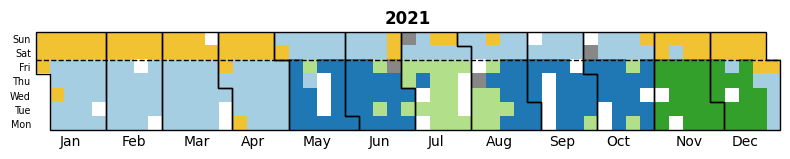

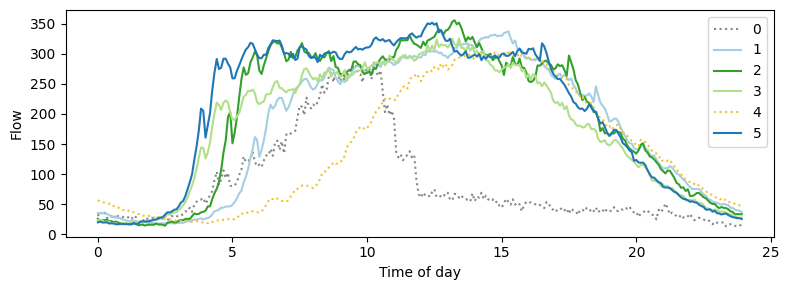



Number of clusters = 7
cluster_id_weekdays_share [6, 2, 45, 6, 92, 33, 52]
cluster_id_weekend_share [43, 2, 0, 56, 0, 0, 0]
111


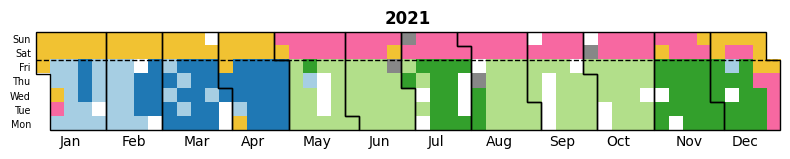



Number of clusters = 8
cluster_id_weekdays_share [69, 19, 1, 71, 1, 25, 5, 45]
cluster_id_weekend_share [0, 27, 39, 0, 2, 0, 33, 0]
111


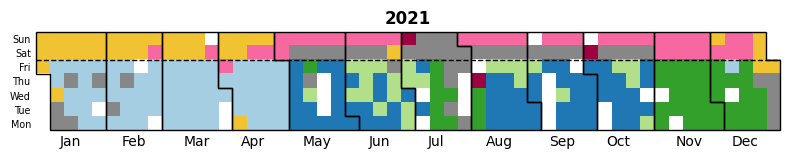



Number of clusters = 9
cluster_id_weekdays_share [32, 31, 7, 32, 6, 32, 1, 45, 50]
cluster_id_weekend_share [0, 0, 56, 0, 43, 0, 2, 0, 0]
111


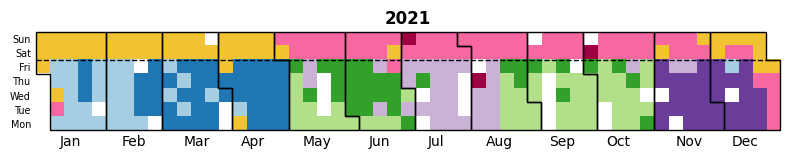

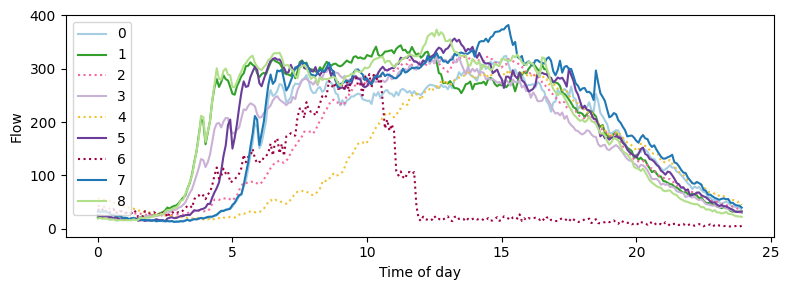



Number of clusters = 10
cluster_id_weekdays_share [42, 6, 83, 9, 1, 4, 33, 27, 1, 30]
cluster_id_weekend_share [0, 43, 0, 13, 2, 43, 0, 0, 0, 0]
111


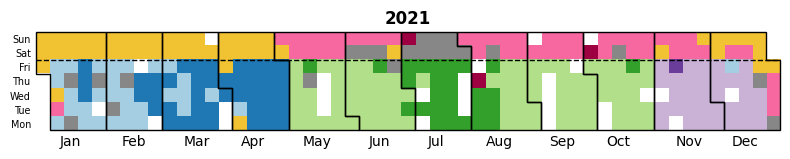

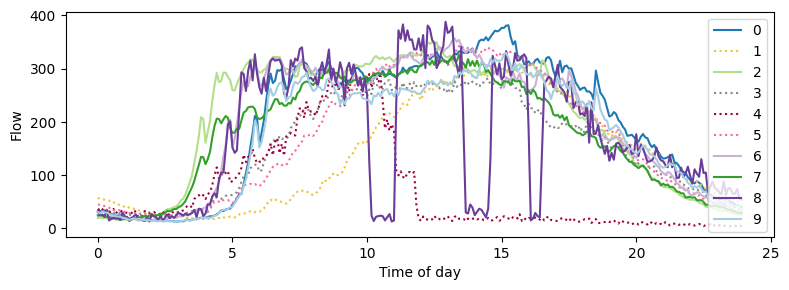



Number of clusters = 11
cluster_id_weekdays_share [63, 5, 6, 1, 9, 34, 18, 4, 36, 28, 32]
cluster_id_weekend_share [0, 19, 41, 2, 0, 0, 0, 39, 0, 0, 0]
111


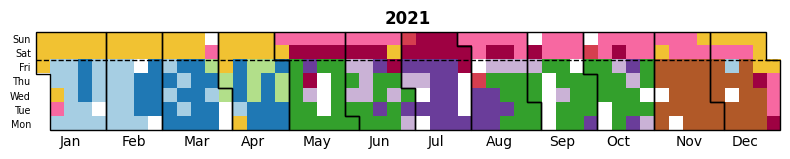

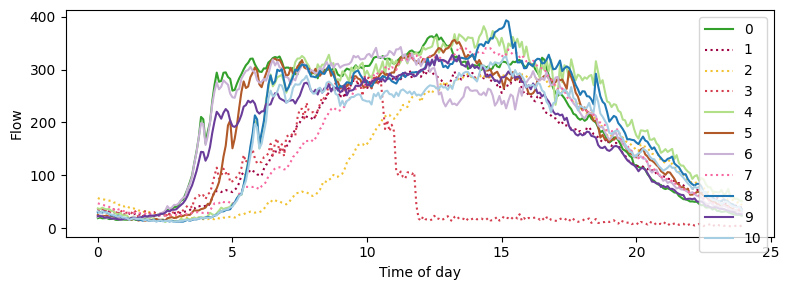



 Nr of Clusters  Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score       MAE     MAPE
              6          0.220132              1.543737                98.173530 26.780748 0.281114
              7          0.213944              1.615303               102.186517 25.684814 0.271709
              8          0.190905              1.722386                92.573360 24.796134 0.251318
              9          0.188868              1.814234                85.888324 24.789050 0.245215
             10          0.199449              1.494758                79.774056 24.497409 0.244674
             11          0.167322              1.897435                73.449468 24.558529 0.244871




In [68]:
#GMM

for j in range(0,1): # this serves no purpose except I did not want to change the indentation.

  evaluation_scores = []
  #trying different number of clusters
  for i in range(6,12):

    ##################################
    ##### CLUSTERING
    ##################################
    n_clusters = i
    clusters = None

    #clusters = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage=linkage).fit(vectorized_day_dataset_no_nans) # check the parameters at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

    #if clusters is not None:
      #cluster_labels = clusters.labels_

    cluster_labels = GaussianMixture(n_components=n_clusters).fit(vectorized_day_dataset_no_nans).predict(vectorized_day_dataset_no_nans) #check the parameters at  https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_init.html#sphx-glr-auto-examples-mixture-plot-gmm-init-py


    ######################################
    #### VISUALISATION
    #######################################
    if plot_vis:

      print("Number of clusters = " + str(n_clusters))
    ## Calendar visualisation

      # Assign colors to days based on clusters
      days_colors, color_to_cluster, style_to_cluster = assign_colors(n_clusters, days_not_nans, cluster_labels)

      # Create a calendar visualization figure
      make_calendar_visualization_figure(days_not_nans, cluster_labels, n_clusters, [2021], days_colors, color_to_cluster, save_figure=None)

      # Day-time profile

      # Initialize empty lists to store centroid data
      centroids_xx = []  # x-axis values for centroids
      centroids_yy_daytypes = []  # y-axis values for centroids, grouped by day types
      cluster_ids = []  # Cluster IDs

      # Iterate through each cluster
      for i in range(0, n_clusters):

        centroids_xx.append(x_axis_hours) # Store the x-axis values for centroids (hours of the day)

        # Calculate the y-axis values for centroids (average flow for each 5-minute interval)
        centroid_yy = list(np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).transpose())
        centroids_yy_daytypes.append(centroid_yy)

        # Store the cluster ID
        cluster_ids.append(i)

      # Generate a figure displaying the centroids
      make_figure_centroids(centroids_xx, centroids_yy_daytypes, color_to_cluster, style_to_cluster, cluster_ids)

      print('\n')

    ########################################
    #### INTERNAL EVALUATION
    #######################################

    #Calc scores
    SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels) # Silhouette Score measures the quality of clusters, higher values indicate better separation.
    DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels) # Davies-Bouldin Score measures the average similarity between each cluster and its most similar cluster, lower values indicate better separation.
    CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels) # Calinski-Harabasz Score measures the ratio of between-cluster variance to within-cluster variance, higher values indicate better separation.


    ######################################################
    ## EXTERNAL EVALUATION
    #####################################################
    # Initialize a list to store centroid data
    centroids = []

    # Calculate centroids for each cluster
    for i in range(0, n_clusters):
        centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).reshape(1, nintvals)
        centroids.append(centroid)

    # Define the number of past intervals to consider for classification
    n_past_intervals_for_classification = 5

    # Initialize variables to calculate accuracy metrics
    total_mae = 0
    total_mape = 0
    prediction_counts = 0

    # Loop through each day in the evaluation dataset with no missing values
    for i in range(0, ndays_eval_not_nans):
        # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
        for j in range(n_past_intervals_for_classification, nintvals - 1):
            # Find the closest centroid for the current data point
            centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

            # Predict the value for the next interval
            predicted_value = centroids[centroid_index][0, j + 1]

            # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
            mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
            mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

            # Accumulate MAE, MAPE, and count of predictions
            total_mae += mae_t
            total_mape += mape_t
            prediction_counts += 1

    evaluation_scores.append({
          'Nr of Clusters': n_clusters,
          'Silhouette Score': SC_score,
          'Davies-Bouldin Score': DB_score,
          'Calinski-Harabasz Score': CH_score,
          'MAE' : total_mae / prediction_counts,
          'MAPE' : total_mape / prediction_counts,
      })


  # Make dataframe
  evaluation_scores_df = pd.DataFrame(evaluation_scores)

  # Display the DataFrame with all scores
  print(evaluation_scores_df.to_string(index=False))
  print('\n')
